<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#импорт-библиотек" data-toc-modified-id="импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>импорт библиотек</a></span></li><li><span><a href="#изучение-файла" data-toc-modified-id="изучение-файла-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>изучение файла</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

1. [Изучение данных из файла](#start)
    - [импорт библиотек](#import)
    - [изучение файла](#study)
    - [вывод](#output1)
2. [Предобработка данных](#preprocessing)
    - [Обработка пропусков](#processing)
    - [Замена типа данных](#null)
    - [вывод](#output2)
3. [Расчеты и добавление результатов](#resalt)
    - [вывод](#output3)
4. [Исследовательский анализ данных](#analysis)
5. [Общий вывод](#output)
6. [Чек-лист готовности проекта](#list)

## Изучение данных из файла
<a id="start"></a>

### импорт библиотек
<a id="import"></a>

In [1]:
import pandas as pd# импорт библиотеки pandas
import numpy as np #Импорт модуля numpy. numpy работает с однородными многомерными массивами (матрицами).
import pathlib #Импорт модуля pathlib. Модуль Pathlib в Python упрощает работу с файлами и папками.
from pathlib import Path
from IPython.display import display #импортируем метод display из библиотеки IPython.display
import matplotlib.pyplot as plt #Импорт модуля matplotlib
import seaborn as sns

### изучение файла
<a id="study"></a>

Откроем файл и изучим его.

In [2]:
pd.set_option('display.max_columns', None) #Снятие ограничения на количество выводимых столбцов
flat = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
flat.head(10)#получение первых 10 строк таблицы data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
flat.info() # получение общей информации о данных в таблице data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
display(flat.isnull().sum())# определение количества NaN элементов в записях (Ожидаемые)
display(flat.nunique())# количество уникальных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

total_images              38
last_price              2978
total_area              2182
first_day_exposition    1491
rooms                     17
ceiling_height           183
floors_total              36
living_area             1782
floor                     33
is_apartment               2
studio                     2
open_plan                  2
kitchen_area             971
balcony                    6
locality_name            364
airports_nearest        8275
cityCenters_nearest     7642
parks_around3000           4
parks_nearest            995
ponds_around3000           4
ponds_nearest           1096
days_exposition         1141
dtype: int64

In [6]:
flat.describe()#просмотр некоторых основных статистических данных

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод
<a id="ooo"></a>

Всего датафрейм data содержит 22 столбцов: 
    - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    - balcony — число балконов
    - ceiling_height — высота потолков (м)
    - cityCenters_nearest — расстояние до центра города (м)
    - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    - first_day_exposition — дата публикации
    - floor — этаж
    - floors_total — всего этажей в доме
    - is_apartment — апартаменты (булев тип)
    - kitchen_area — площадь кухни в квадратных метрах (м²)
    - last_price — цена на момент снятия с публикации
    - living_area — жилая площадь в квадратных метрах(м²)
    - locality_name — название населённого пункта
    - open_plan — свободная планировка (булев тип)
    - parks_around3000 — число парков в радиусе 3 км
    - parks_nearest — расстояние до ближайшего парка (м)
    - ponds_around3000 — число водоёмов в радиусе 3 км
    - ponds_nearest — расстояние до ближайшего водоёма (м)
    - rooms — число комнат
    - studio — квартира-студия (булев тип)
    - total_area — площадь квартиры в квадратных метрах (м²)
    - total_images — число фотографий квартиры в объявлении
 
Датафрейм содержит 12 признаков (4 из них — качественные, а 8 — количественные) и 23699 объекта, есть пропуски. Типы данных столбцов:  bool(2), float64(14), int64(3), object(3). Память занимает 3.7+ MB 

В  стобцах: total_images, last_price, total_area, first_day_exposition, rooms, floor, studio ,open_plan объекты значимы - не  NaN.
В столбцах выявлены NaN в следующем количестве:   ceiling_height - 9195, floors_total - 86, living_area - 1903, is_apartment - 20924, kitchen_area - 2278, balcony - 11519, locality_name - 49, airports_nearest - 5542, cityCenters_nearest - 5519, parks_around3000 - 5518, parks_nearest - 15620, ponds_around3000 - 5518, ponds_nearest - 14589, days_exposition - 3181.
   
Присутствуют столбцы тип данных которых надо менять на другой тип: last_price - int, total_area - float, first_day_exposition - datetime, balcony -  int, days_exposition - int, first_day_exposition - date, floors_total - int, parks_around3000 - int, ponds_around3000 - int, ponds_nearest - int.

В 5 столбцах Даты Фрема содержания NaN находится в диапозоне от 40% и до 90%. Чем может быть вызвано такое большое количество пропусков? Попробуем разобраться.
   
- ceiling_height - важный параметр. Нужно посмотреть в каких объявлениях отсутствуют данные. 
- living_area - важный параметр. Нужно посмотреть для каких объявления отсутствуют данные и уже потом думать как быть и что делать.
- is_apartment - пропуски могли быть из-за того, что параметр относительно новый. Апартаменты появлились в РФ довольно не давно. Их объем на рынке продаж невелик. Однако можно предположить, что если этот параметр не заполняли, значит недвижимость относится к жилому помещению, т.е. квартира. Пропуски заменить на отсутствие.
- kitchen_area - отсутствие данного параметра возможно это ошибка в выгрузке данных или их заполнении.
- balcony - скорее всего его просто нет. Пропуски заменим нулями.
- airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest - для данных пропусков можно предположить одинаковые причины: заполняющие данные могли просто не знать в скольких метрах от объекта расположен аэропорт, центр города, парк, водоем, а уточнять этот параметр не захотели или объект недвижимости заведомо находится очень далеко от этих мест. Скорее всего эти пропуски относятся к Ленинградской области, этот момент нужно уточнить. Так же данные могут отсутствать по причине необязательности заполнения этих столбцов. 
- days_exposition - важный параметр. Информация может отсутствовать, например, по причине того, что неизвестно когда было закрыто объявление о продаже или оно до сих пор еще находится в продаже. 
- locality_name -  скорее всего подающие объявления решили что все известно в каком месте находится квартира. Очевидно, что если они выставляют квартиру на продажу в разделе сайта "Санкт-Петербург", то и квартира в Санкт-Петербурге. Поэтому там где указано расстояние от центра города смело можем заменить пропуск на "Санкт-Петербург".

## Предобработка данных
<a id="preprocessing"></a>

###  Обработка пропусков
<a id='processing'></a>

Посмотрим значения в столбцах для выявления нестандартных значений на первый взгляд и ошибок, 

Апартаменты официально в РФ появились с 2012. Это -  две и более жилые комнаты (гостиная/столовая и спальня (кабинет)), в средстве размещения (гостиница, мотель, дом отдыха, санаторий и т.п.), общей площадью не менее 40 кв. В жилом доме не могут располагаться апартаменты, если это не специально построенный комплекс. Пропущенные значения заменим на их отсутсвие.

In [7]:
flat['is_apartment'] = flat['is_apartment'].fillna(value=False)#Заменим пропущенные значения методом fillna. 

Отсутствующие данные по балконам, заменим на нули. Данные отсутствуют, ввиду того, что в квартире нет балкона. 

In [8]:
flat['balcony'] = flat['balcony'].fillna(value=0)#Заменим пропущенные значения методом fillna

У нас отсутствует местоположение некоторых выставленных квартир, но есть расстояние до центра города и аэропорта. Люди, которые продавали квартиру, считали, что всем и так понятно где она находится. Произведем замену следующим образом: те квартиры, в которых известно расстояние до центра города и аэропорта - отнесем к Санкт-Петербургу. Остальные, к городам находящимся в Ленинградской области.

In [9]:
#Заменим пропущенные значения методом fillna
flat.loc[(flat['locality_name'].isnull()) & (flat['cityCenters_nearest'].isnull()), 'locality_name']=flat.loc[(flat['locality_name'].isnull()) & (flat['cityCenters_nearest'].isnull()), 'locality_name'].fillna('Ленинградская область')
flat['locality_name'] = flat['locality_name'].fillna('Санкт-Петербург')

Заполняем пропущенные значения в столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest. Если данные относятся к квартире расположенной в г. Санкт-Петербург, то средним значением, если город находится в области, то нулем.

In [10]:
#Заменим пропущенные значения методом fillna
flat.loc[(flat['airports_nearest'].isnull()) & (flat['locality_name']=='Санкт-Петербург'), 'airports_nearest']=flat.loc[(flat['airports_nearest'].isnull()) & (flat['locality_name']=='Санкт-Петербург'), 'airports_nearest'].fillna(flat['airports_nearest'].mean())
flat['airports_nearest'] = flat['airports_nearest'].fillna(0)

In [11]:
#Заменим пропущенные значения методом fillna
flat.loc[(flat['cityCenters_nearest'].isnull()) & (flat['locality_name']=='Санкт-Петербург'), 'cityCenters_nearest']=flat.loc[(flat['cityCenters_nearest'].isnull()) & (flat['locality_name']=='Санкт-Петербург'), 'cityCenters_nearest'].fillna(flat['cityCenters_nearest'].mean())
flat['cityCenters_nearest'] = flat['cityCenters_nearest'].fillna(0)

In [12]:
#Заменим пропущенные значения методом fillna
flat.loc[(flat['parks_around3000'].isnull()) & (flat['locality_name']=='Санкт-Петербург'), 'parks_around3000']=flat.loc[(flat['parks_around3000'].isnull()) & (flat['locality_name']=='Санкт-Петербург'), 'parks_around3000'].fillna(flat['parks_around3000'].mean())
flat['parks_around3000'] = flat['parks_around3000'].fillna(0)

In [13]:
#Заменим пропущенные значения методом fillna
flat.loc[(flat['ponds_around3000'].isnull()) & (flat['locality_name']=='Санкт-Петербург'), 'ponds_around3000']=flat.loc[(flat['ponds_around3000'].isnull()) & (flat['locality_name']=='Санкт-Петербург'), 'ponds_around3000'].fillna(flat['ponds_around3000'].mean())
flat['ponds_around3000'] = flat['ponds_around3000'].fillna(0)

In [14]:
#Заменим пропущенные значения методом fillna
flat.loc[(flat['parks_nearest'].isnull()) & (flat['parks_around3000']==0), 'parks_nearest']=flat.loc[(flat['parks_nearest'].isnull()) & (flat['parks_around3000']==0), 'parks_nearest'].fillna(0)
flat.loc[(flat['parks_nearest'].isnull()) & (flat['parks_around3000']!=0), 'parks_nearest']=flat.loc[(flat['parks_nearest'].isnull()) & (flat['parks_around3000']!=0), 'parks_nearest'].fillna(flat['parks_nearest'].mean())

In [15]:
#Заменим пропущенные значения методом fillna
flat.loc[(flat['ponds_nearest'].isnull()) & (flat['ponds_around3000']==0), 'ponds_nearest']=flat.loc[(flat['ponds_nearest'].isnull()) & (flat['ponds_around3000']==0), 'ponds_nearest'].fillna(0)
flat.loc[(flat['ponds_nearest'].isnull()) & (flat['ponds_around3000']!=0), 'ponds_nearest']=flat.loc[(flat['ponds_nearest'].isnull()) & (flat['ponds_around3000']!=0), 'ponds_nearest'].fillna(flat['ponds_nearest'].mean())

Недостающие данные заполнели следующим образом. По Санкт-Петербургу средними значениями, по остальным - нулями. Т.к. населенные пункты могут располагаться рядом с аэропотом, могут быть также удалены на значительное расстояние. Поэтому будем считать, что ноль - обозначает отсутсвие данных по этому параметру.

In [16]:
#Заменим пропущенные значения методом fillna
flat.loc[(flat['airports_nearest'].isnull()) & (flat['locality_name'] == 'Санкт-Петербург'), 'airports_nearest']=flat.loc[(flat['airports_nearest'].isnull()) & (flat['locality_name'] == 'Санкт-Петербург'), 'airports_nearest'].fillna(flat['airports_nearest'].mean())
flat.loc[(flat['airports_nearest'].isnull()) & (flat['locality_name'] != 'Санкт-Петербург'), 'airports_nearest']=flat.loc[(flat['airports_nearest'].isnull()) & (flat['locality_name'] != 'Санкт-Петербург'), 'airports_nearest'].fillna(0)
#flat.query('airports_nearest.isnull()')[['airports_nearest', 'locality_name', 'parks_around3000', 'cityCenters_nearest', 'ponds_around3000', 'parks_nearest']].head(20)

В данных есть пропуски в столбцах living_area и kitchen_area, посмотрим на них и подумаем как их можно заполнить. Сначала построим зависимость жилой от общей площади кваритры и рассчитаем корреляцию.

0.9395373338721491


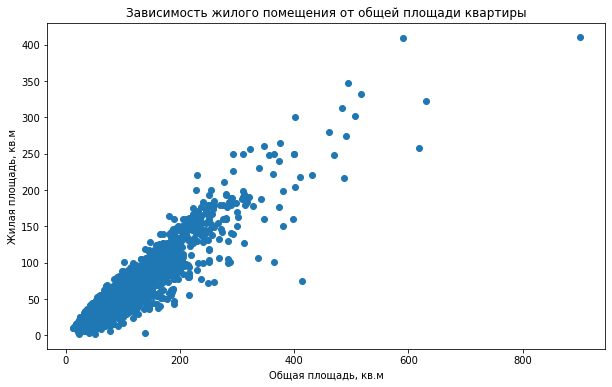

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = flat['total_area'], y = flat['living_area'])
plt.title('Зависимость жилого помещения от общей площади квартиры')
plt.xlabel("Общая площадь, кв.м")
plt.ylabel("Жилая площадь, кв.м")
print(flat['living_area'].corr(flat['total_area']))

Корреляция составляет 0,94. Это значит, что жилое пространство и площадь квартиры зависят друг от друга. Следовательно если известна общая площадь недвижимости, то можно восстановить значение жилой площади.
Найдем среднее отношение жилой  к общей площади для всего Дата фрейма.

In [18]:
living_total_area = (flat['living_area'] / flat['total_area']).mean()#fрассчитаем среднее значение отношения жилой площади к общей
#living_total_area

Проведем замену пустых значений в столбце living_area следующим образом, общую площадь умножим на вычисленный коэффициент living_total_area отношения жилого помещения к общей площади квартиры.

In [19]:
flat['living_area'] = flat['living_area'].fillna(flat['total_area']*living_total_area)#fПроведем замену пустых значений

Тоже самое проделаем с кухней.

0.6091211711198314


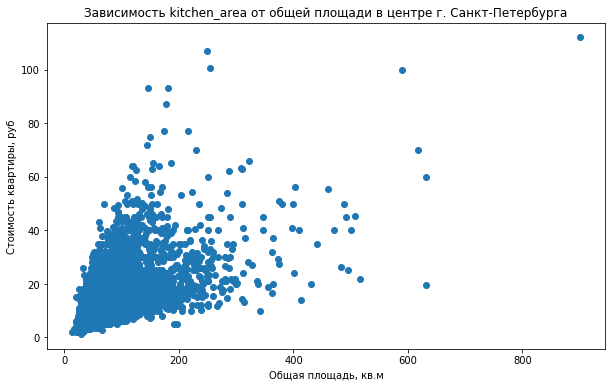

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = flat['total_area'], y = flat['kitchen_area'])
plt.title('Зависимость kitchen_area от общей площади в центре г. Санкт-Петербурга')
plt.xlabel("Общая площадь, кв.м")
plt.ylabel("Стоимость квартиры, руб")
print(flat['kitchen_area'].corr(flat['total_area']))

Коэффициент корреляции 0,61. Немного меньше, чем коэффициент корреляции для жилой площади, но все же достаточный, что бы воспользоваться методикой замены пустых значений, которую применили для жилого помещения.

In [21]:
kitchen_total_area = flat['kitchen_area'] / flat['total_area'].mean()

In [22]:
flat['kitchen_area'] = flat['kitchen_area'].fillna(flat['total_area']*kitchen_total_area)

Заполнение пропусков по высоте потолков сделаем следующим образом. Сначала посмотрим какая часть пропусков относится к г. Санкт-Петербург, а какая к городам расположеным в Ленинградской области.

In [23]:
flat_city= flat.query('locality_name == ["Санкт-Петербург"]').sort_values('ceiling_height')

flat_other= flat.query('locality_name != ["Санкт-Петербург"]').sort_values('ceiling_height')

print('Общее количество NaN по ceiling_height:', flat['ceiling_height'].isnull().sum())
print('Количество NaN по ceiling_height:',flat_city['ceiling_height'].isnull().sum(), 'в Санкт-Петербурге')
print('Количество NaN по ceiling_height:', flat_other['ceiling_height'].isnull().sum(), 'в другом городе')

Общее количество NaN по ceiling_height: 9195
Количество NaN по ceiling_height: 5646 в Санкт-Петербурге
Количество NaN по ceiling_height: 3549 в другом городе


Мы видим, что около двух третий пропусков относится к квартирам находящимся в Санкт-Перербурге, одна треть - в других городах.
Замену пропущенных значений проведем следующим образом. Для квартир расположенных в других городах сделаем замену по среднему значению для всех квартир находящихся в этих городах. 
Для города Санкт-Перербург замену провем воспользовавшись методом transform(), т.к. в городе находится множество домов построенных в разные периоды и высота потолка там может колебаться от 2,5 до 4 м.

In [24]:
flat.loc[(flat['ceiling_height'].isnull()) & (flat['locality_name'] != 'Санкт-Петербург'), 'ceiling_height']=flat.loc[(flat['ceiling_height'].isnull()) & (flat['locality_name'] != 'Санкт-Петербург'), 'ceiling_height'].fillna(flat['ceiling_height'].mean())
flat.loc[(flat['ceiling_height'].isnull()) & (flat['locality_name'] == 'Санкт-Петербург'), 'ceiling_height']=flat.loc[(flat['ceiling_height'].isnull()) & (flat['locality_name'] == 'Санкт-Петербург'), 'ceiling_height'].fillna(flat["ceiling_height"].median())
#flat.head(10)
flat['ceiling_height'].describe()

count    23699.000000
mean         2.754465
std          0.986994
min          1.000000
25%          2.600000
50%          2.700000
75%          2.771499
max        100.000000
Name: ceiling_height, dtype: float64

### Замена типа данных
<a id='null'></a>

Проведем в столбцах замену типа данных.

In [25]:
flat = flat.astype({"total_images":'int8', "rooms":'int8', "floor":'int8', "balcony":'int8', 
                    "parks_around3000":'int8', "ponds_around3000":'int8', "total_area":'int16', "last_price":'int32', 
                    "parks_nearest":'int32', "ponds_nearest":'int32', "cityCenters_nearest":'int32', 
                    "airports_nearest":'int32'})# замена  типа данных на целочисленный 
flat['first_day_exposition'] = pd.to_datetime(flat['first_day_exposition'], format='%Y-%m-%d')# замена  типа данных на времянной 
flat['kitchen_area'] = flat['kitchen_area'].round(1)# округление до первого знака после запятой
flat['living_area'] = flat['living_area'].round(1)
flat['ceiling_height']=flat['ceiling_height'].round(1)

In [26]:
flat.info()# смотрим что получилось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int8
last_price              23699 non-null int32
total_area              23699 non-null int16
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int8
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int8
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int8
locality_name           23699 non-null object
airports_nearest        23699 non-null int32
cityCenters_nearest     23699 non-null int32
parks_around3000        23699 non-null int8
parks_nearest           23699 non-null int32
ponds_around3000        23

In [27]:
flat.duplicated().sum()# получение суммарного количества дубликатов в таблице flat

0

### Вывод
<a id="output2"></a>

В столбцах is_apartment,  balcony и locality_name проведена замена пропущенных значений. 
В kitchen_area, living_area, ceiling_height значения округлины до одного знака после запятой. В first_day_exposition произведена замена на временной тип данных. Остальные столбцы заменены на целостный тип, кроме значений относящихся к типу bool.
В столбце rooms обнаружены нули, но ничего с ними делать не будем, т.к. они находятся в студиях.
Методом duplicates() дубликаты не обнаружены.

## Расчёты и добавление результатов в таблицу
<a id="resalt"></a>

Рассчитаем цену квадратного метра и округлим до первого знака после запятой, получившийся результат добавим в новый стобец metre имеющейся таблицы flat

In [28]:
flat['metre'] = (flat['last_price'] / flat['total_area']).round(1)

Определим в какой день недели, месяц и год были опубликованы объявления о продаже недвижимости и добавим результаты в новые столбцы weekday,  month, и year таблицы flat соответсвенно.

In [29]:
flat['weekday'] = flat['first_day_exposition'].dt.weekday#номер дня в неделе найдем методом dt.weekday
flat['month'] = flat['first_day_exposition'].dt.month
flat['year'] = flat['first_day_exposition'].dt.year

Сгруппируем все этажи: первый, последний и другой, и добавим в новый столбец floor_group исходной таблицы flat.

In [30]:
flat['floor_group']  = np.where(flat['floor'] ==1, 'первый', 'другой')#методом where() проверим таблицу flat на наличие нескольких условий и вернем соответствующий результат
flat['floor_group']  = np.where(flat['floor'] == flat['floors_total'], 'последний', flat['floor_group'])    

Посчитаем соотношение жилой к общей площади, а также отношение площади кухни к общей площади квартиры.
Результаты добавим в  столбцы:living_ratio и kitchen_ratio исходной таблицы flat.

In [31]:
flat['living_ratio'] = (flat['living_area'] / flat['total_area']).round(1)
flat['kitchen_ratio'] = (flat['kitchen_area'] / flat['total_area']).round(1)

### Вывод
<a id="output3"></a>

Произведены необходимые расчеты:
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

Полученные результаты размещаны в новых столбцах исходной таблицы.

## Исследовательский анализ данных
<a id="analysis"></a>

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

In [32]:
flat[['total_area','last_price','rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23699.000000,2.369900e+04,23699.000000,23699.000000
mean,60.120511,6.541549e+06,2.070636,2.761315
std,35.665822,1.088701e+07,1.078405,0.987073
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.700000
75%,69.000000,6.800000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


Text(0.5, 0, 'Общая площадь, кв.м.')

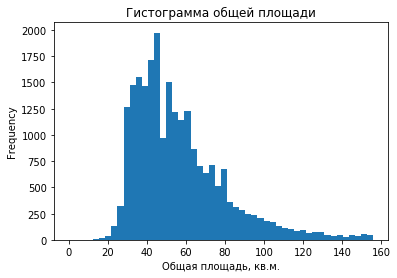

In [33]:
def flat_mm(col):#создаем новую функцию  flat_mm(col)
    q1 = flat[col].quantile(0.25)#которая рассчитывает интервал для построения графиков
    q3 = flat[col].quantile(0.75)
    iqr = q3 - q1
    min=q1 - (3*iqr)
    max=q3 + (3*iqr)
    return min>=0, max


def flat_hist(value, mesh, ambit):#создаем новую функцию flat_hist(value, mesh, ambit), 
                                                    #которая возвращает гистограмму
    return flat[value].plot(kind='hist', y="value", bins=mesh, range = ambit)

def flat_groupby(point1, point2):#создаем новую функцию flat_groupby(point1, point2), 
                                                    #которая группирует, расчитывает медиану и возвращает график.
    return flat.groupby(point1)[point2].median().plot(x=point1,y=point2,grid=True, figsize=(10,5))

def flat_corr(term1, term2):#создаем новую функцию flat_corr(term1, term2), 
                                                    #которая возвращает корреляцию.
    return flat[term1].corr(flat[term2])

flat_hist('total_area', 50, (flat_mm('total_area')))#вызываем функцию flat_hist(value, mesh, ambit), строим гистограмму
plt.title('Гистограмма общей площади')
plt.xlabel("Общая площадь, кв.м.")

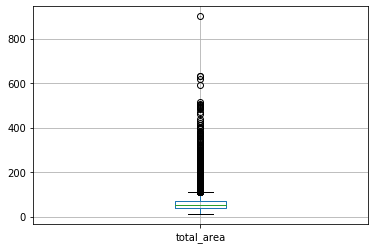

In [34]:
flat.boxplot(column='total_area')

Text(0.5, 0, 'Стоимость квартиры, руб.')

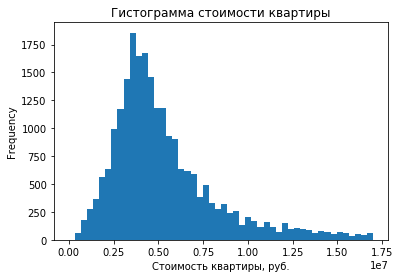

In [35]:
flat_hist('last_price', 50, (flat_mm('last_price')))#вызываем функцию flat_hist(value, mesh, ambit), строим гистограмму
plt.title('Гистограмма стоимости квартиры')
plt.xlabel("Стоимость квартиры, руб.")

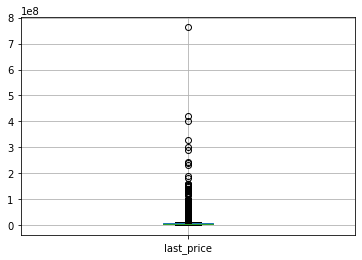

In [36]:
flat.boxplot(column='last_price')

Text(0.5, 0, 'Количество комнат')

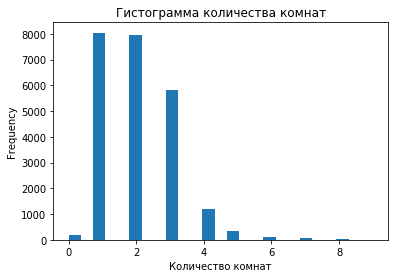

In [37]:
flat_hist('rooms', 25, (flat_mm('rooms')))#вызываем функцию flat_hist(value, mesh, ambit), строим гистограмму
plt.title('Гистограмма количества комнат')
plt.xlabel("Количество комнат")

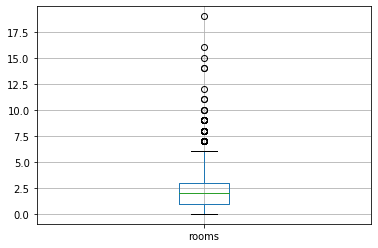

In [38]:
flat.boxplot(column='rooms')

count    23699.000000
mean         2.761315
std          0.987073
min          1.000000
25%          2.600000
50%          2.700000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

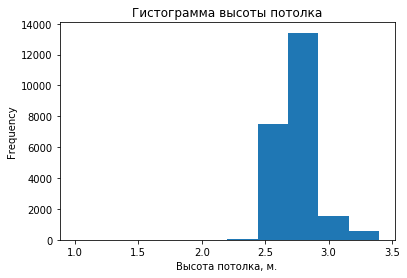

In [39]:
flat_hist('ceiling_height', 10, (flat_mm('ceiling_height')))#вызываем функцию flat_hist(value, mesh, ambit), строим гистограмму
plt.title('Гистограмма высоты потолка')
plt.xlabel("Высота потолка, м.")

flat.ceiling_height.describe()#просмотр некоторых основных статистических данных

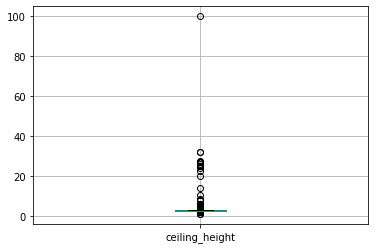

In [40]:
flat.boxplot(column='ceiling_height')

На графике цена квартиры от общей площади наблюдаем пик в области от 30 до 60 кв.м.
Самые популярные квартиры находятся в диапозоне 4,5 млн. руб.
Квартиры с одной и двумя комнатами чаще продаются.
Наибольшее количество, выставляемых квартир, имеют высоту потолка 2,6-2,7 м.

Изучим время продажи квартиры. Построем гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

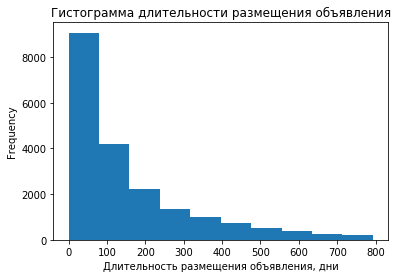

In [41]:
flat_hist('days_exposition', 10, (flat_mm('days_exposition')))
plt.title('Гистограмма длительности размещения объявления')
plt.xlabel("Длительность размещения объявления, дни")
flat.days_exposition.describe()#просмотр некоторых основных статистических данных

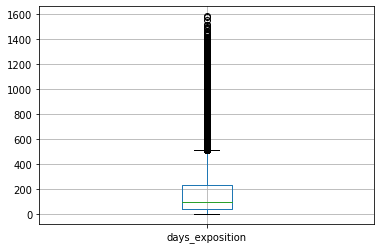

In [42]:
flat.boxplot(column='days_exposition') #Посмотрим методом boxplot() диаграмму размаха

Любая точка данных меньше, чем Q1 – 1.5хIQR и любая точка данных, превышающая Q3 + 1.5хIQR, считается выбросом.
Увеличим масштаб для того, чтобы рассмотреть детально. Для этого ограничем срок продаж 500 днями. Все что более 500 дней считаем самыми долгими продажами.

Теперь разберемся с самыми короткими.

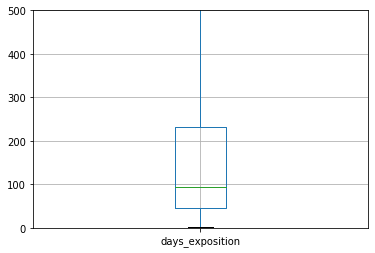

In [43]:
plt.ylim(0,500)#Уменьшим выборку до 500 дней.
flat.boxplot(column='days_exposition') #Посмотрим методом boxplot() диаграмму размаха
plt.show()

Text(0.5, 0, 'Длительность размещения объявления, дни')

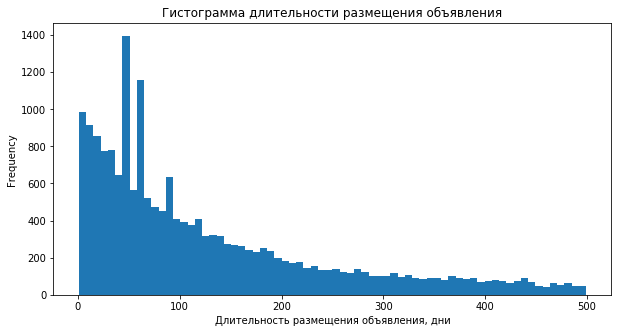

In [44]:
flat.query('days_exposition<500')['days_exposition'].plot(kind='hist', bins=70, title = 'days_exposition', figsize=(10,5))# метод query() получим срез df flat и постоим гистограмму.
plt.title('Гистограмма длительности размещения объявления')
plt.xlabel("Длительность размещения объявления, дни")

Продажи квартир продолжительностью 200 дней — уже редки. При значение 500 дней гистограмма стремится к  нулю. Будем считать, что самая долгая продажа это 350 дней. Это число кажется разумным: дольше продажи идут все реже и реже. 

Посмотрим ближе наши пики

Text(0.5, 0, 'Длительность размещения объявления, дни')

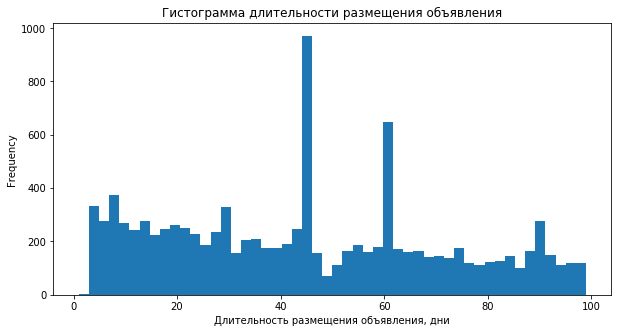

In [45]:
flat.query('0<days_exposition<100')['days_exposition'].plot(kind='hist', bins=50, title = 'days_exposition',figsize=(10,5))# метод query() получим срез df flat и постоим гистограмму.
plt.title('Гистограмма длительности размещения объявления')
plt.xlabel("Длительность размещения объявления, дни")

Посмотрим какой процент составляют сделки со сроком продаж меньше 5 дней от дня подачи объявления о продаже.

In [46]:
print(len(flat.query('days_exposition <= 5')) / len(flat)*100) 

2.067597788936242


Максимальное количество дней, в течение которых продавалась квартира 1580 дней - около 5 лет. Если квартира находится в непопулярном месте и в глуши, то период ее экспозиции может быть и больше. Среднее количество дней продажи - 180, медианое значение равное 95 дням.
Из графика видно, что наибольшее количество сделок приходится на 45, 60 и 90 дни продаж. Эти времена хорошо отображают действительность, ведь для того, чтобы выставить квартиру на продажу необходимо найти клиента, подготовить документы к сделке и провести ее. Конечно, сделка может совершиться и в день выхода объявления, но доля таких сделок ничтожно мала и скорее всего они относятся к сделкам совершаемых на первичном рынке недвижимости, где оформление документов занимает минимальные сроки. 
Сделки прошли быстро когда срок экспозиции меньше пяти дней - это около 2 % всех сделок.
К длительным сделкам, отнесем все сделки, которые были выставлены более 350 дней.

Уберем редкие и выбивающиеся значения. Опишем, какие особенности обнаружили.

В данных высота потолка колеблится от 1 до 100 м. В то время как в теплых зонах потолок должен располагаться на высоте не менее 2,7 метра, а для остальных районов минимальная высота потолка составляет 2,5 метра.
Стандартная высота потолков в квартире типового дома – от 2.50 м до 2.70 м. Если речь идет о старых хрущевках, то типовыми проектами предусмотрены 250 см. Однако, в Санкт-Петербурге есть дома еще до Революционной застройки, где высота потолков может достигать 4 м. Точно установить к какому дому относятся предоставленные квартиры у нас нет возможности. Будем считать, что необсновано высокие потолки выше 4 метров - это ошибка при заполнении, забыли поставить запятую. Значения высоты потолка меньше 2,5 м, приведем к среднему значению. Пропущенные данные оставим  так как есть,т.к. не знаем в каких домах находятся квартиры.

In [47]:
flat['ceiling_height']  = np.where(flat['ceiling_height'] > 4, (flat['ceiling_height'] / 10), flat['ceiling_height']) #методом where() проверим таблицу flat на наличие нескольких условий и вернем соответствующий результат
flat['ceiling_height']  = np.where(flat['ceiling_height'] < 2.5, (flat['ceiling_height'].mean()), flat['ceiling_height']) 
flat[flat['ceiling_height'] >4].sort_values('ceiling_height').tail(20)# методом sort_values () отсортируем таблицу и выведем нижние 20 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre,weekday,month,year,floor_group,living_ratio,kitchen_ratio
22869,0,15000000,25,2018-07-25,1,10.0,5.0,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963,8283,1,223,3,30,19.0,600000.0,2,7,2018,последний,0.6,0.4


Осталось одна квартира с высотой потолка выше 4 метров. Приведем ее тоже в порядок.

count    23699.000000
mean         2.731259
std          0.202960
min          2.500000
25%          2.600000
50%          2.700000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

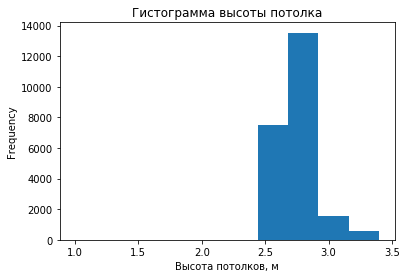

In [48]:
flat['ceiling_height']  = np.where(flat['ceiling_height'] ==10, (flat['ceiling_height'].mean()), flat['ceiling_height']) #методом where() проверим таблицу flat на наличие нескольких условий и вернем соответствующий результат
#flat['ceiling_height'].hist(bins=10,range=(2.0,4))
flat['ceiling_height']=flat['ceiling_height'].round(1)
flat_hist('ceiling_height', 10, (flat_mm('ceiling_height')))#вызываем функцию flat_hist(value, mesh, ambit), строим гистограмму
plt.title('Гистограмма высоты потолка')
plt.xlabel("Высота потолков, м")
flat.ceiling_height.describe()#просмотр некоторых основных статистических данных

Медианое значение высоты потолка равно 2,6 м, среднее - 2,8 м.
Наибольшим спросом пользуются квартиры с высотой потолка 2,8 м. Неудивительно учитывая типовую застройку.

Сделаем срез Дата фрейма убрав все выбросы обнаруженные выше, оставим только необходимые для анализа данные:
- days_exposition от 5 до 365 дней;
- rooms до семи комнат;
- total_area от 10 до 160 кв. м.;
- last_price  диапазон от 2500000 до 17000000 руб.;
- ceiling_height от 2 до 4 м.

In [49]:
flat_flat=flat.query('5<days_exposition <365 & 0<rooms < 7 & 10 < total_area < 160 & 2500000< last_price < 17500000 & 2 < ceiling_height < 4') # впишите условие создания нужной выборки

Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

Text(0, 0.5, 'Стоимость квартиры, кв. м.')

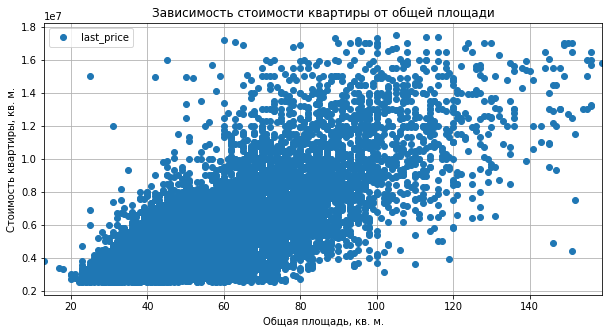

In [50]:
def flat_plot(valx, valy): #создаем новую функцию flat_plot(valx, valy, znach), 
                                                    #которая возвращает график. Параметр style, со значением 'o',добавляет графику точности
    return flat_flat.plot(x=valx, y=valy, style='o', grid=True, figsize=(10, 5), title = valx), plt.xlabel(valx), plt.ylabel(valy)

def flat_flat_corr(term11, term22):#создаем новую функцию flat_flat_corr(term11, term22), 
                                                    #которая возвращает корреляцию.
    return flat_flat[term11].corr(flat[term22])

flat_plot('total_area', 'last_price')#вызываем функцию flat_plot(valx, valy, znach), строим гистограмму

plt.title('Зависимость стоимости квартиры от общей площади')
plt.xlabel("Общая площадь, кв. м.")
plt.ylabel("Стоимость квартиры, кв. м.")

In [51]:
flat_total_area=flat_flat.pivot_table(index='total_area',values='last_price',aggfunc=('count','mean'))# метод pivot_table() посчитаем среднюю стоимость 
                                                                                                                                               # одного метра квадратного взависимости от общей площади
flat_total_area.sort_values(by='count',ascending=False).head(10)# методом sort_values () отсортируем таблицу и выведем верхние 10 строк

,count,mean
total_area,,
45,510.0,4.331314e+06
44,439.0,4.193112e+06
42,418.0,4.204581e+06
31,372.0,3.276715e+06
35,368.0,3.690138e+06
46,367.0,4.372757e+06
43,367.0,4.219465e+06
40,365.0,4.131369e+06
36,359.0,3.780095e+06


Максимальные продажи приходятся на общую площадь от 30 до 80 кв.м.

0.7605391580820764

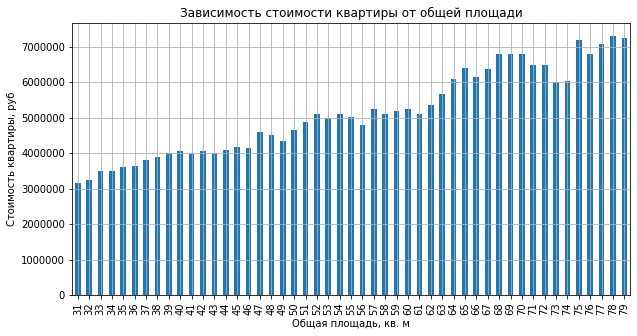

In [52]:
flat_flat[(flat_flat['total_area'] >30) & (flat_flat['total_area'] < 80)].groupby('total_area')['last_price'].median().plot(kind='bar', grid=True,figsize=(10,5) ), plt.xlabel('total_area'), plt.ylabel('last_price')
plt.title('Зависимость стоимости квартиры от общей площади')
plt.xlabel("Общая площадь, кв. м")
plt.ylabel("Стоимость квартиры, руб")

flat_flat_corr('total_area', 'last_price')#вызываем новую функцию flat_flat_corr(term11, term22), расчитываем корреляцию

Стоимость квартиры почти линейно возрастает с увеличением площади недвижимости. Коэффициент корреляции Пирсона = 0,76.

0.4927781202181581

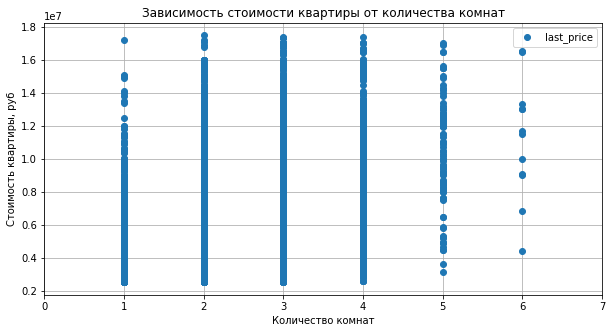

In [53]:
flat_plot('rooms', 'last_price')
plt.xlim(0, 7)
plt.title('Зависимость стоимости квартиры от количества комнат')
plt.xlabel("Количество комнат")
plt.ylabel("Стоимость квартиры, руб")
flat_flat_corr('rooms', 'last_price')#вызываем новую функцию flat_flat_corr(term11, term22), расчитываем корреляцию

Наибольшие количества продаж приходятся в диапозоне однокомнатные - шестикомнатные квартиры. Проверим это предположение.

In [54]:
flat_rooms=flat_flat.pivot_table(index='rooms',values='last_price',aggfunc=('count','mean'))
flat_rooms.sort_values(by='count',ascending=False).head(20)# методом sort_values () отсортируем таблицу и выведем нижние 20 строк

,count,mean
rooms,,
1,5253.0,4.049028e+06
2,5147.0,5.539241e+06
3,3490.0,6.802761e+06
4,565.0,8.068805e+06
5,100.0,1.044859e+07
6,12.0,1.124458e+07


0.4927781202181581

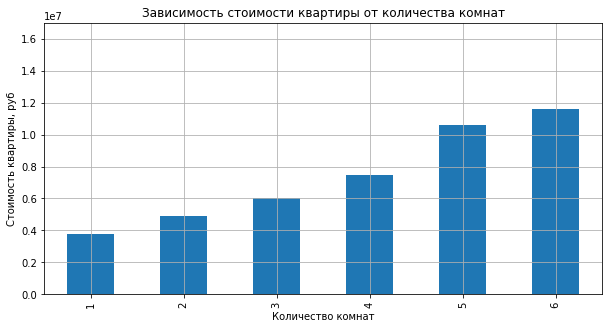

In [55]:
flat_flat.groupby('rooms')['last_price'].median().plot(x='rooms',y='last_price', kind='bar',  grid=True,figsize=(10,5))
plt.ylim(flat_mm('last_price'))
plt.title('Зависимость стоимости квартиры от количества комнат')
plt.xlabel("Количество комнат")
plt.ylabel("Стоимость квартиры, руб")

flat_flat_corr('rooms', 'last_price')#вызываем новую функцию flat_flat_corr(term11, term22), расчитываем корреляцию

Как видно из графика цена за квартиру возрастает с увеличением числа комнат. Корреляция есть, коэффициент корреляции Пирсона  = 0,49.

Text(0, 0.5, 'Стоимость квартиры, руб')

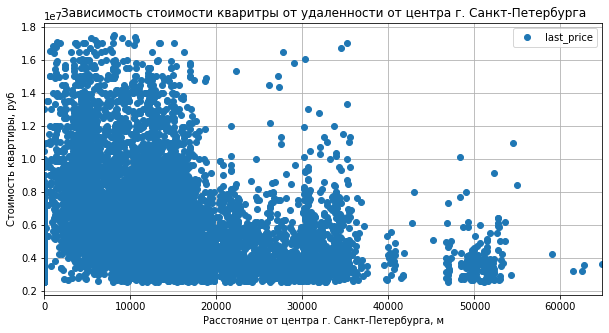

In [56]:
flat_plot('cityCenters_nearest', 'last_price')
plt.title('Зависимость стоимости кваритры от удаленности от центра г. Санкт-Петербурга')
plt.xlabel("Расстояние от центра г. Санкт-Петербурга, м")
plt.ylabel("Стоимость квартиры, руб")

In [57]:
flat_cityCenters_nearest=flat_flat.pivot_table(index='cityCenters_nearest',values='metre',aggfunc=('count','mean'))
flat_cityCenters_nearest.sort_values(by='count',ascending=False).head(10)# методом sort_values () отсортируем таблицу и выведем нижние 10 строк

,count,mean
cityCenters_nearest,,
0,2285,73908.702013
8460,23,130682.343478
13845,18,117187.205556
17369,18,75365.533333
16921,17,123285.664706
15985,17,101310.882353
20802,17,110157.882353
14191,16,113141.243750
25866,16,91855.531250


Рассмотрим расстояние до центра города в радиусе 10 000 м. Ноль не включаем, т.к. мы провели замену на ноль всех значений  для городов, которые находились в области.

-0.10283380856660626

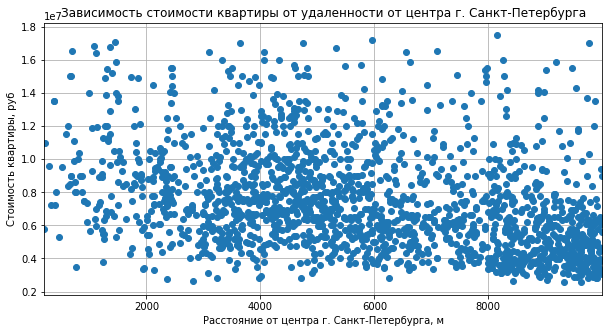

In [58]:
flat_flat[(flat_flat['cityCenters_nearest'] >0) & (flat_flat['cityCenters_nearest'] < 10000)].groupby('cityCenters_nearest')['last_price'].median().plot(x='cityCenters_nearest',y='last_price',style='o',grid=True,figsize=(10,5))
plt.title('Зависимость стоимости квартиры от удаленности от центра г. Санкт-Петербурга')
plt.xlabel("Расстояние от центра г. Санкт-Петербурга, м")
plt.ylabel("Стоимость квартиры, руб")

flat_flat_corr('cityCenters_nearest', 'last_price')#вызываем новую функцию flat_flat_corr(term11, term22), расчитываем корреляцию

Корреляция отрицательная, но близкая к нулю. Цена зависит не только от близости к центру, но и от района.

0.1298717070115852

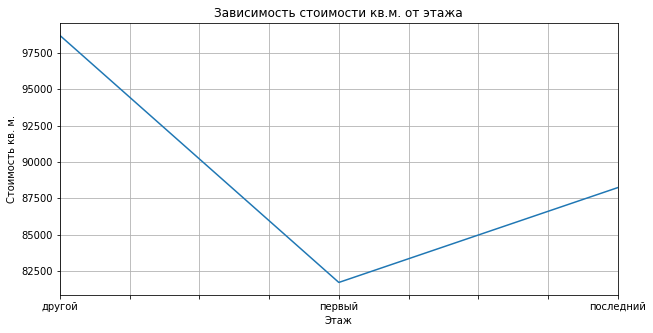

In [59]:
flat_groupby('floor_group', 'metre')
plt.title('Зависимость стоимости кв.м. от этажа')
plt.xlabel("Этаж")
plt.ylabel("Стоимость кв. м.")

flat_corr('floor', 'metre')#вызываем новую функцию flat_corr(term1, term2), расчитываем корреляцию

Первые и последние этажи всегда продаются с дисконтом. Построенный нами график только подтверждает это правило.
Коэффициент корреляции Пирсона = 0,36.

0.0015501452176215431

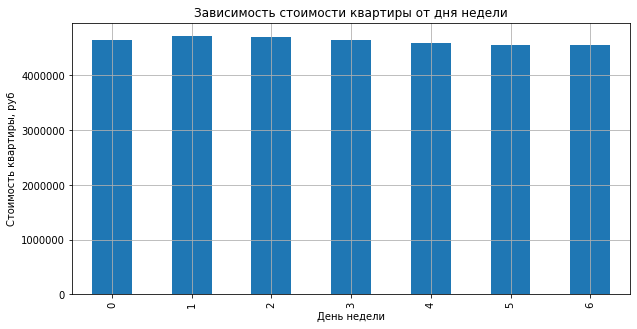

In [60]:
flat.groupby('weekday')['last_price'].median().plot(x='weekday',y='last_price', kind='bar',  grid=True,figsize=(10,5))
plt.title('Зависимость стоимости квартиры от дня недели')
plt.xlabel("День недели")
plt.ylabel("Стоимость квартиры, руб")

flat_corr('weekday', 'last_price')#вызываем новую функцию flat_corr(term1, term2), расчитываем корреляцию

Видно, что цена от дня недели незначительно меняется.По вторникам стоимость квартиры чуть-чуть выше, к концу недели стоимость снижается. Все изменения в районе 5%. Можно сделать вывод, что от дня недели цена не зависит и корреляция отсутствует.

0.0027791287507397252

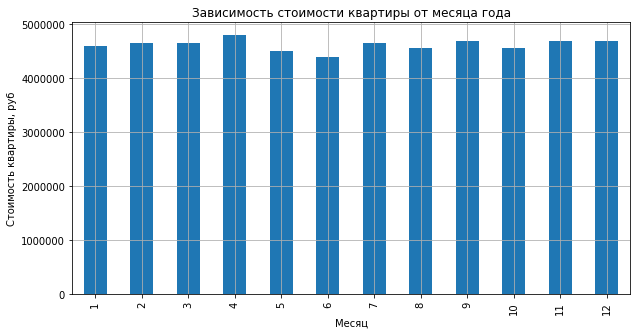

In [61]:
flat.groupby('month')['last_price'].median().plot(x='month',y='last_price',kind='bar', grid=True,figsize=(10,5))
plt.title('Зависимость стоимости квартиры от месяца года')
plt.xlabel("Месяц")
plt.ylabel("Стоимость квартиры, руб")

flat_corr('month', 'last_price')#вызываем новую функцию flat_corr(term1, term2), расчитываем корреляцию

В течение года, видим волнообразное изменение. Мертвый сезон продаж приходится на лето и цены снижаются, чтобы подогреть продажи. Период активных продаж квартир - весна и осень и цены немного подрастают.

-0.04308903619950858

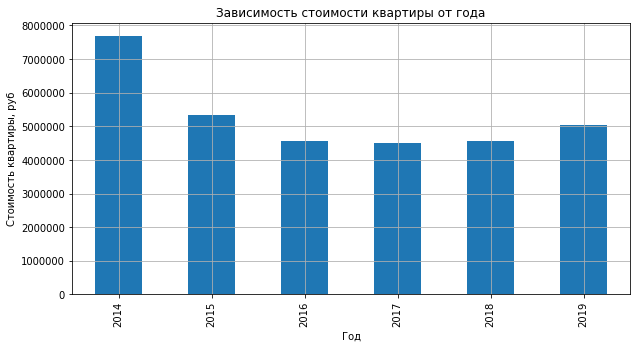

In [62]:
flat.groupby('year')['last_price'].median().plot(x='year',y='last_price', kind='bar', grid=True,figsize=(10,5))
plt.title('Зависимость стоимости квартиры от года')
plt.xlabel("Год")
plt.ylabel("Стоимость квартиры, руб")

flat_corr('year', 'last_price')#вызываем новую функцию flat_corr(term1, term2), расчитываем корреляцию

С 2014 до 2017 года цена снижается, но далее начинается подъем.
Экономическая ситуация в стране сказалась и на рынке недвижимости.

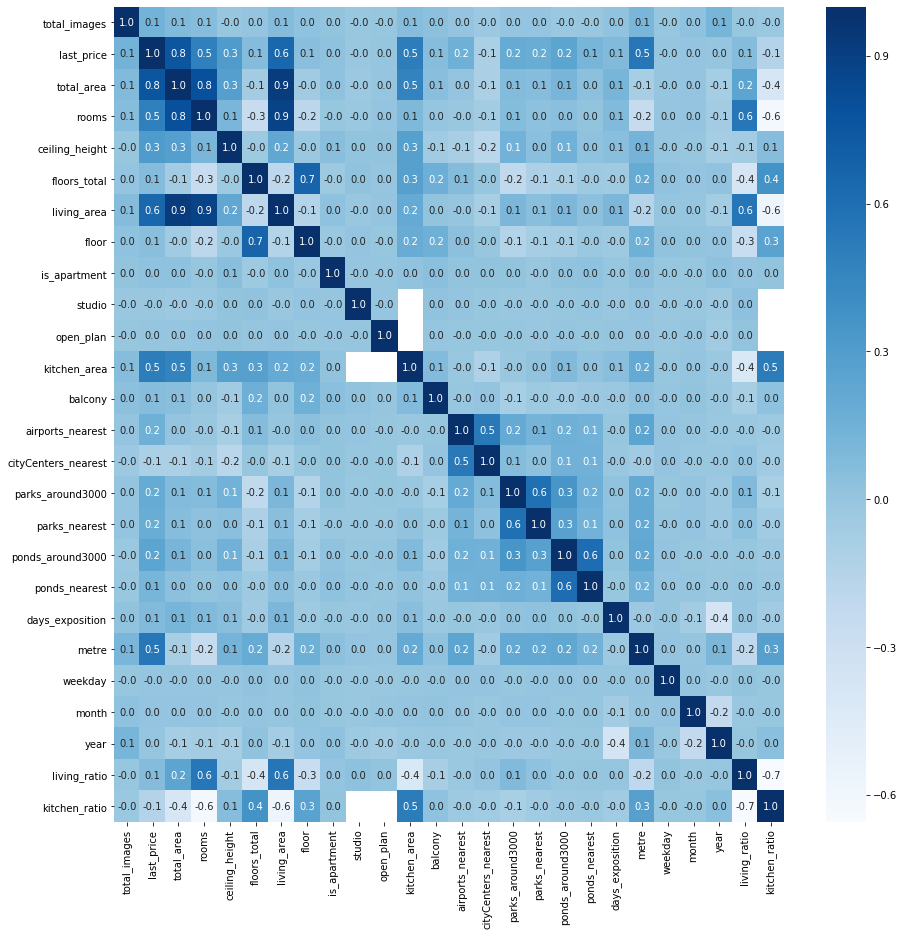

In [63]:
plt.figure(figsize=(15,15))
sns.heatmap(flat_flat.corr(), annot=True, cmap="Blues", fmt='.1f')

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [64]:
flat_good=flat_flat.pivot_table(index='locality_name',values='metre',aggfunc=('count','mean'))
flat_good.sort_values(by='count',ascending=False).head(10)# методом sort_values () отсортируем таблицу и выведем нижние 10 строк

,count,mean
locality_name,,
Санкт-Петербург,10588,106984.944333
посёлок Мурино,386,87068.870207
посёлок Шушары,328,78621.955183
Колпино,250,74749.922000
Пушкин,245,100507.380816
посёлок Парголово,244,90309.847541
Всеволожск,228,68686.361842
деревня Кудрово,228,92631.150439
Гатчина,164,71160.873780


Text(0, 0.5, 'Стоимость квартиры, руб')

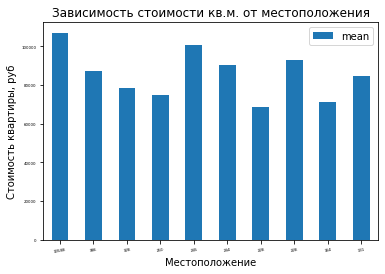

In [65]:
flat_good.sort_values(by='count',ascending=False).head(10).plot(x="count", y="mean", kind="bar", rot=10, fontsize=4)
plt.title('Зависимость стоимости кв.м. от местоположения')
plt.xlabel("Местоположение")
plt.ylabel("Стоимость квартиры, руб")

Самый дорогой квадратный метр, как и следовало ожидать в г. Санкт-Петербург, самый дешевый - Гатчина

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге. Выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. Посчитаем среднюю цену для каждого километра. Построем график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

-0.38480252930356745

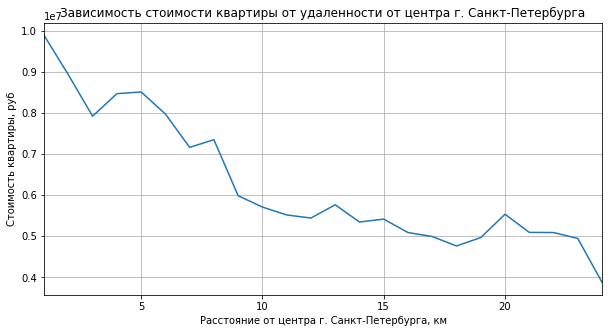

In [66]:
flat_sankt= flat_flat.query('locality_name == ["Санкт-Петербург"]').sort_values('cityCenters_nearest')# методом sort_values () отсортируем столбец 
flat_sankt['radio_Centers_nearest'] = (flat_sankt['cityCenters_nearest'] / 1000).round(0)
flat_sankt.head(10)
flat_sankt[(flat_sankt['radio_Centers_nearest'] !=0) & (flat_sankt['radio_Centers_nearest'] < 25)].groupby('radio_Centers_nearest')['last_price'].mean().plot(x='radio_Centers_nearest',y='last_price', grid=True,figsize=(10,5))
plt.title('Зависимость стоимости квартиры от удаленности от центра г. Санкт-Петербурга')
plt.xlabel("Расстояние от центра г. Санкт-Петербурга, км")
plt.ylabel("Стоимость квартиры, руб")
flat_sankt['radio_Centers_nearest'].corr(flat['last_price'])

Санкт-Петербург самый северный из городов-миллионеров, он расположен между 60° 5’ (Промзона Парнас) и 59° 48’ сев. шир. Протяжённость города с восток на запад — 25 км, с севера на юг — 52 км, с северо-запада на юго-восток — около 90 км.
Попробуем найти центр города по приведенному графику. Центр до 3 км, центральная часть города от 3 км до 8 км., город от 8 до 28 км и окраина города все что более 28 км.

In [67]:
def radio_Centers(cityCenters_nearest): # создаем новую функцию income_count(total_income), которая возвращает: 
    if cityCenters_nearest < 3000: 
                return 'центр' #  'первый', если радиус меньше 12 500 м.
    if 3000 <= cityCenters_nearest < 8000:
                return 'центральная часть города' # 'второй', если радиус находится в диапозоне от 12 500 до 26 000 м
    if 8000<= cityCenters_nearest < 28000:
                return 'город' # 'третий', если радиус находится в диапозоне от 26 000 до 45 000 м 
    return 'окраина города'    #  'область', если радиус находится за пределами 90 000 м

flat_sankt['radio_Centers'] = flat_flat['cityCenters_nearest'].apply(radio_Centers) 
flat_sankt.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre,weekday,month,year,floor_group,living_ratio,kitchen_ratio,radio_Centers_nearest,radio_Centers
1182,1,5800000,33,2016-03-10,1,3.7,7.0,22.8,4,False,False,False,6.6,0,Санкт-Петербург,21632,208,3,304,3,503,167.0,175757.6,3,3,2016,другой,0.7,0.2,0.0,центр
8614,7,10990000,100,2015-12-16,3,3.9,5.0,37.8,3,False,False,False,11.6,0,Санкт-Петербург,21818,215,3,229,2,511,265.0,109900.0,2,12,2015,другой,0.4,0.1,0.0,центр
1934,18,9590000,108,2017-05-23,2,3.3,5.0,59.0,2,False,False,False,11.0,0,Санкт-Петербург,21908,287,3,359,3,290,69.0,88796.3,1,5,2017,другой,0.5,0.1,0.0,центр
22036,3,7200000,72,2017-12-21,2,3.1,3.0,44.9,2,False,False,False,12.3,0,Санкт-Петербург,21875,329,3,426,3,273,89.0,100000.0,3,12,2017,другой,0.6,0.2,0.0,центр
8677,15,13500000,98,2017-12-19,3,3.5,5.0,46.0,3,False,False,False,22.0,0,Санкт-Петербург,21369,376,3,541,3,222,35.0,137755.1,1,12,2017,другой,0.5,0.2,0.0,центр
8239,10,13500000,96,2018-08-06,3,3.2,7.0,67.3,3,False,False,False,14.8,0,Санкт-Петербург,21982,387,3,138,2,657,14.0,140625.0,0,8,2018,другой,0.7,0.2,0.0,центр
2609,20,7200000,80,2017-08-24,3,2.8,4.0,43.0,1,False,False,False,8.0,0,Санкт-Петербург,21832,399,3,415,2,516,11.0,90000.0,3,8,2017,первый,0.5,0.1,0.0,центр
9488,3,8000000,106,2018-07-26,3,3.4,4.0,59.9,1,False,False,False,NaN,0,Санкт-Петербург,21653,410,3,591,2,38,60.0,75471.7,3,7,2018,первый,0.6,NaN,0.0,центр
2988,2,5300000,49,2016-11-09,3,2.7,3.0,30.0,3,False,False,False,7.0,0,Санкт-Петербург,21919,467,2,256,3,305,232.0,108163.3,2,11,2016,последний,0.6,0.1,0.0,центр
5747,3,9500000,81,2016-05-17,2,2.7,4.0,41.0,2,False,False,False,16.0,0,Санкт-Петербург,22444,515,2,550,2,234,159.0,117284.0,1,5,2016,другой,0.5,0.2,1.0,центр


Выделим сегмент квартир в центре. Проанализируем эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы. Отличаются ли они от общих выводов по всему городу?

In [68]:
flat_sankt_good=flat_sankt[(flat_sankt['radio_Centers']=='центр')]#создадим новую таблицу, в которой будут все данные по квартирам расположенным в центре 
flat_sankt_good.head(10)#посмотрим на нее

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metre,weekday,month,year,floor_group,living_ratio,kitchen_ratio,radio_Centers_nearest,radio_Centers
1182,1,5800000,33,2016-03-10,1,3.7,7.0,22.8,4,False,False,False,6.6,0,Санкт-Петербург,21632,208,3,304,3,503,167.0,175757.6,3,3,2016,другой,0.7,0.2,0.0,центр
8614,7,10990000,100,2015-12-16,3,3.9,5.0,37.8,3,False,False,False,11.6,0,Санкт-Петербург,21818,215,3,229,2,511,265.0,109900.0,2,12,2015,другой,0.4,0.1,0.0,центр
1934,18,9590000,108,2017-05-23,2,3.3,5.0,59.0,2,False,False,False,11.0,0,Санкт-Петербург,21908,287,3,359,3,290,69.0,88796.3,1,5,2017,другой,0.5,0.1,0.0,центр
22036,3,7200000,72,2017-12-21,2,3.1,3.0,44.9,2,False,False,False,12.3,0,Санкт-Петербург,21875,329,3,426,3,273,89.0,100000.0,3,12,2017,другой,0.6,0.2,0.0,центр
8677,15,13500000,98,2017-12-19,3,3.5,5.0,46.0,3,False,False,False,22.0,0,Санкт-Петербург,21369,376,3,541,3,222,35.0,137755.1,1,12,2017,другой,0.5,0.2,0.0,центр
8239,10,13500000,96,2018-08-06,3,3.2,7.0,67.3,3,False,False,False,14.8,0,Санкт-Петербург,21982,387,3,138,2,657,14.0,140625.0,0,8,2018,другой,0.7,0.2,0.0,центр
2609,20,7200000,80,2017-08-24,3,2.8,4.0,43.0,1,False,False,False,8.0,0,Санкт-Петербург,21832,399,3,415,2,516,11.0,90000.0,3,8,2017,первый,0.5,0.1,0.0,центр
9488,3,8000000,106,2018-07-26,3,3.4,4.0,59.9,1,False,False,False,NaN,0,Санкт-Петербург,21653,410,3,591,2,38,60.0,75471.7,3,7,2018,первый,0.6,NaN,0.0,центр
2988,2,5300000,49,2016-11-09,3,2.7,3.0,30.0,3,False,False,False,7.0,0,Санкт-Петербург,21919,467,2,256,3,305,232.0,108163.3,2,11,2016,последний,0.6,0.1,0.0,центр
5747,3,9500000,81,2016-05-17,2,2.7,4.0,41.0,2,False,False,False,16.0,0,Санкт-Петербург,22444,515,2,550,2,234,159.0,117284.0,1,5,2016,другой,0.5,0.2,1.0,центр


Text(0.5, 0, 'Общая площадь, кв.м.')

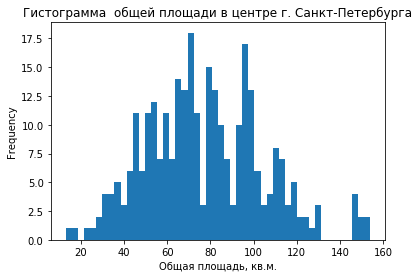

In [69]:
def flat_sankt_good_mm(colг):#создаем новую функцию  flat_mm(col)
    q1 = flat_sankt_good[colг].quantile(0.25)#которая рассчитывает интервал для построения графиков
    q3 = flat_sankt_good[colг].quantile(0.75)
    iqr = q3 - q1
    min=q1 - (1.5*iqr)
    max=q3 + (3*iqr)
    return min, max

def  flat_sankt_good_hist(val, mes):#создаем новую функцию flat_hist(value, mesh, ambit), 
                                                    #которая возвращает гистограмму
    return flat_sankt_good[val].plot(kind='hist', y=val, bins=mes, title = val)

flat_sankt_good_hist('total_area', 50)
plt.title('Гистограмма  общей площади в центре г. Санкт-Петербурга')
plt.xlabel("Общая площадь, кв.м.")

Text(0.5, 0, 'Стоимость квартиры, руб')

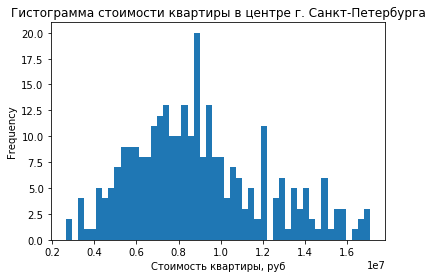

In [70]:
flat_sankt_good_hist('last_price', 50)
plt.title('Гистограмма стоимости квартиры в центре г. Санкт-Петербурга')
plt.xlabel("Стоимость квартиры, руб")

Text(0.5, 0, 'Количество комнат')

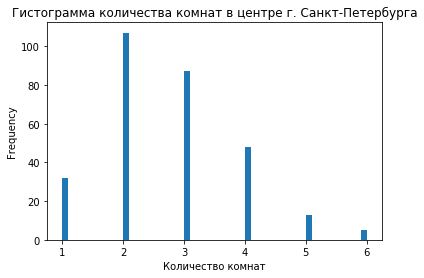

In [71]:
flat_sankt_good_hist('rooms', 50)
plt.title('Гистограмма количества комнат в центре г. Санкт-Петербурга')
plt.xlabel("Количество комнат")

Text(0.5, 0, 'Высота потолка,м')

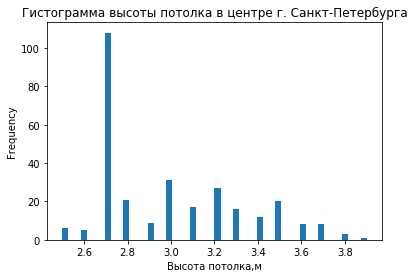

In [72]:
flat_sankt_good_hist('ceiling_height', 50)
plt.title('Гистограмма высоты потолка в центре г. Санкт-Петербурга')
plt.xlabel("Высота потолка,м")

0.7605391580820764

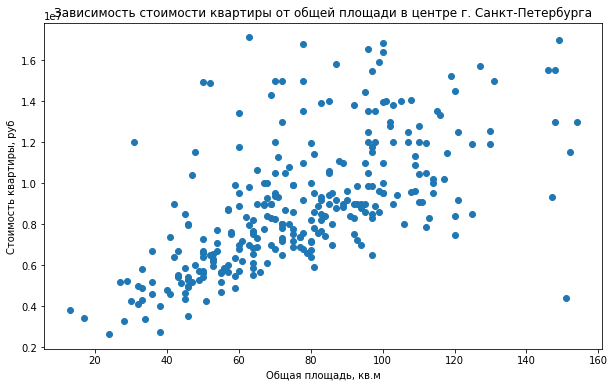

In [73]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = flat_sankt_good['total_area'], y = flat_sankt_good['last_price'])
plt.title('Зависимость стоимости квартиры от общей площади в центре г. Санкт-Петербурга')
plt.xlabel("Общая площадь, кв.м")
plt.ylabel("Стоимость квартиры, руб")
flat_flat_corr('total_area', 'last_price')

В центре пользуются популярностью двух-, трех- и четырехкомнатные квартиры общей площадью от 50 до 100 кв.м.  с высотой потолков 2,75 м. Удаленность от центра не должна превышать 200 м. Самые стоимость квартиры находится в диапозоне 9 млн. руб.

In [74]:
def flat_sankt_good_groupby(dot1, dot2):#создаем новую функцию flat_groupby(point1, point2), 
                                                    #которая группирует, расчитывает медиану и возвращает график.
    return flat_sankt_good.groupby(dot1)[dot2].median().plot(x=dot1,y=dot2, kind='bar', ax=ax, grid=True,figsize=(10,5))

С увеличением площади стоимость квартиры возрастает. Корреляция есть, коэффициент корреляции Пирсона не изменился, так же равен 0,65.

Text(0, 0.5, 'Стоимость квартиры, руб')

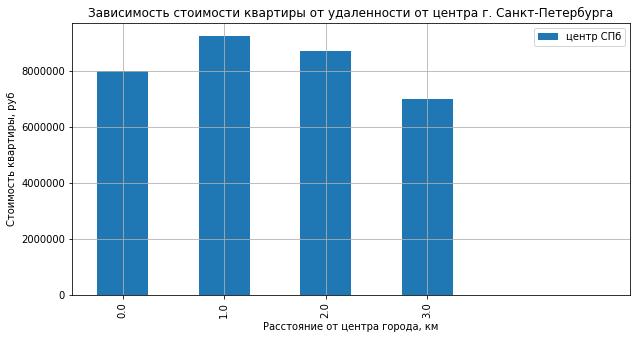

In [75]:
ax = plt.gca()
flat_sankt_good_groupby('radio_Centers_nearest', 'last_price')
plt.xlim(flat_sankt_good_mm('radio_Centers_nearest'))
plt.legend(['центр СПб'])
plt.title('Зависимость стоимости квартиры от удаленности от центра г. Санкт-Петербурга')
plt.xlabel("Расстояние от центра города, км")
plt.ylabel("Стоимость квартиры, руб")

Чем дальше от центра, тем дешевле.

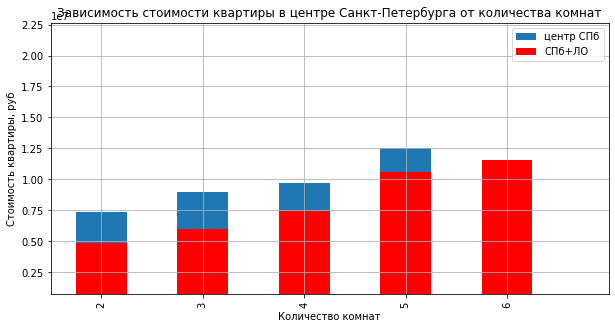

0.4927781202181581

In [76]:
ax = plt.gca()
flat_sankt_good_groupby('rooms', 'last_price')
flat_flat.groupby('rooms')['last_price'].median().plot(x='rooms',y='last_price', kind='bar', ax=ax, grid=True,figsize=(10,5), color='r')
plt.ylim(flat_sankt_good_mm('last_price'))
plt.xlim(flat_sankt_good_mm('rooms'))
plt.title('Зависимость стоимости квартиры в центре Санкт-Петербурга от количества комнат')
plt.xlabel("Количество комнат")
plt.ylabel("Стоимость квартиры, руб")
plt.legend(['центр СПб', 'СПб+ЛО'])
plt.show()
flat_flat_corr('rooms', 'last_price')

Количество комнат связано с общей площадью кватиры, следовательно, чем больше общая площадь, тем дороже стоимость квартиры.
У всего есть свои пределы. Коэффициент корреляции Пирсона = 0,49.

0.3115334677758336

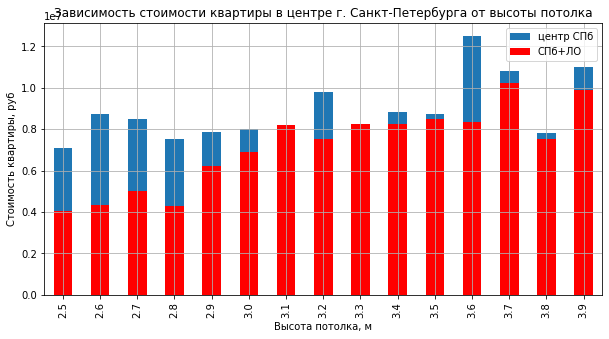

In [77]:
ax = plt.gca()
flat_sankt_good_groupby('ceiling_height', 'last_price')
flat_flat.groupby('ceiling_height')['last_price'].median().plot(x='ceiling_height',y='last_price', kind='bar', ax=ax, grid=True,figsize=(10,5), color='r')
plt.title('Зависимость стоимости квартиры в центре г. Санкт-Петербурга от высоты потолка')
plt.legend(['центр СПб', 'СПб+ЛО'])
plt.xlabel("Высота потолка, м")
plt.ylabel("Стоимость квартиры, руб")
flat_flat_corr('ceiling_height', 'last_price')

Все хотят жить в удобной, благоустроенной квартире. Высота потолков влияет на ценообразование недвижимости. В центре города высокие потолки ценятся выше, чем если рассматривать город и область. В целом потолок выше и цена выше. Коэффициент корреляции Пирсона = 0,31.

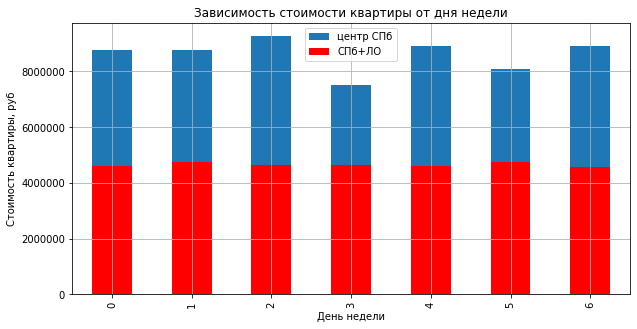

-6.869920037642465e-05

In [78]:
ax = plt.gca()
flat_sankt_good_groupby('weekday', 'last_price')
flat_flat.groupby('weekday')['last_price'].median().plot(x='weekday',y='last_price',grid=True,  kind='bar', ax=ax, figsize=(10,5), legend=True, color='r')
plt.title('Зависимость стоимости квартиры от дня недели')
plt.legend(['центр СПб', 'СПб+ЛО'])
plt.xlabel("День недели")
plt.ylabel("Стоимость квартиры, руб")
plt.show()

flat_flat_corr('last_price', 'weekday')

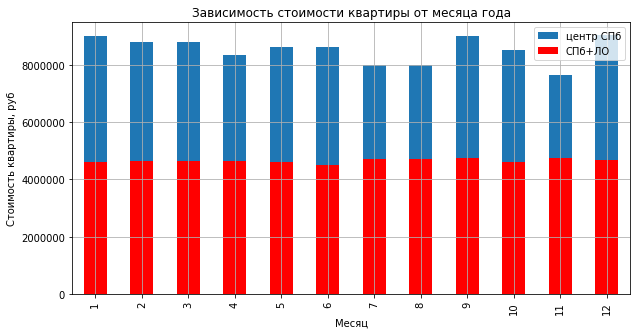

0.005602604568232682

In [79]:
ax = plt.gca()
flat_sankt_good_groupby('month', 'last_price')
flat_flat.groupby('month')['last_price'].median().plot(x='month',y='last_price',grid=True,  kind='bar', ax=ax, figsize=(10,5), legend=True, color='r')
plt.title('Зависимость стоимости квартиры от месяца года')
plt.legend(['центр СПб', 'СПб+ЛО'])
plt.xlabel("Месяц")
plt.ylabel("Стоимость квартиры, руб")
plt.show()

flat_flat_corr('month', 'last_price')

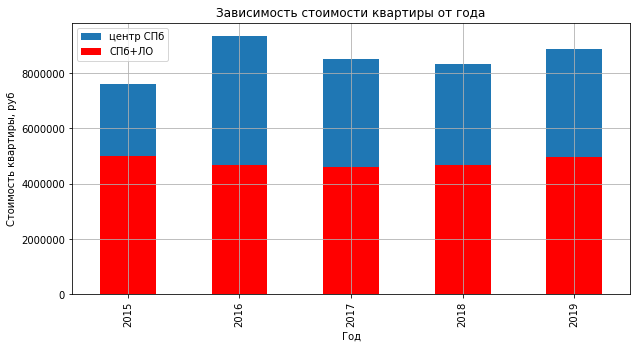

0.0012403065426622698

In [80]:
ax = plt.gca()
flat_sankt_good_groupby('year', 'last_price')
flat_flat.groupby('year')['last_price'].median().plot(x='year',y='last_price',grid=True,  kind='bar', ax=ax, figsize=(10,5), legend=True, color='r')
plt.title('Зависимость стоимости квартиры от года')
plt.legend(['центр СПб', 'СПб+ЛО'])
plt.xlabel("Год")
plt.ylabel("Стоимость квартиры, руб")
plt.show()
flat_flat_corr('year', 'last_price')

В центре города ярче выражено изменение стоимости квартиры от дня недели, месяца и года. Однако, везде коэффициент корреляции Пирсона близок к нулю. Изменение цены вызвано другими факторами и от дня недели, месяца или года не зависит. 

## Общий вывод
<a id="output"></a>

1. Обработав полученный архив данных, было проведено исследование полученных данных, обработаны пропущенные значения где это требовалось, заменены типы данных.
2. В таблицу были добавлены:
    - новые столбцы с ценой квадратного метра жилья, предварительно посчитав ее, 
    - дни недели, месяцы и года размещения объявлений, выведенные из даны подачи объявления, 
    - категории по этажам квартир. 
3. Параметры: площадь, цена, число комнат, высота потолков были изучены с точки зрения аномальных значений. Были найдены выбросы в данных параметрах. Потолки были необосновано высокими. Было сделано предположение, но в этом виноват человеческий фактор. 
4. В результате проделанной работы было выявлено, что стоимость квартиры больше всего зависит от общей площади, количества комнат, этажа квартиры, высоты потолков и близости к центру. Время размещения день недели оказывает незначительное влияние на стоимость квартиры, однако месяц и год отражают влияние внешних факторов на ценообразование рынка недвижимости. Рынок недвижимости оживает весной и осенью, летом - мертвый сезон. Так же есть зависимость от года, сказывается влияние экономической ситуации в стране. 
5. В работе удалось определить центр города в радиусе 3 км, по резкому изменению цен в зависимости от удаления от центра Санкт-Петербурга.
6. Исследованы зависимости стоимости квартир от общей площади, количества комнат, этажа квартиры, высоты потолков и времени размещения объявлений, находящихся в центре города. Выявлено, что зависимости не изменили своих характеристик.
Однако, изменились параметры.

| Расположение        | общая площадь, кв.м.          | количество комнат  | высота потолка, м        | стоимость квартиры, млн. р    | 
|:------------------:|:----------------------------------:|: ------------------------------:|:---------------:|:-----------------------:|
| центр города              |  30-60 | 1-2 | 2,6-2,7     | 4-5  | 
| вся выборка   | 50-100      |   2-4  | 2,75   |  8-10   | 


## Чек-лист готовности проекта
<a id="list"></a>

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x ]  файлы изучены (выведены первые строки, метод info())
- [x ]  определены пропущенные значения
- [x ]  заполнены пропущенные значения
- [x ]  есть пояснение, какие пропущенные значения обнаружены
- [ x]  изменены типы данных
- [x ]  есть пояснение, в каких столбцах изменены типы и почему
- [x ]  посчитано и добавлено в таблицу: цена квадратного метра
- [x ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x ]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x ]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x ]  построены гистограммы для каждого параметра
- [x ]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x ]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x ]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x ]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x ]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x ]  в каждом этапе есть выводы
- [x ]  есть общий вывод